<a href="https://colab.research.google.com/github/BridgetHolt/DS4002/blob/main/SCRIPTS/3_VADER_Anaylsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install seaborn

<ipython-input-14-fcd9b26004dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='CelebrityBranded', y='CompoundScore', data=df, palette='Set1')


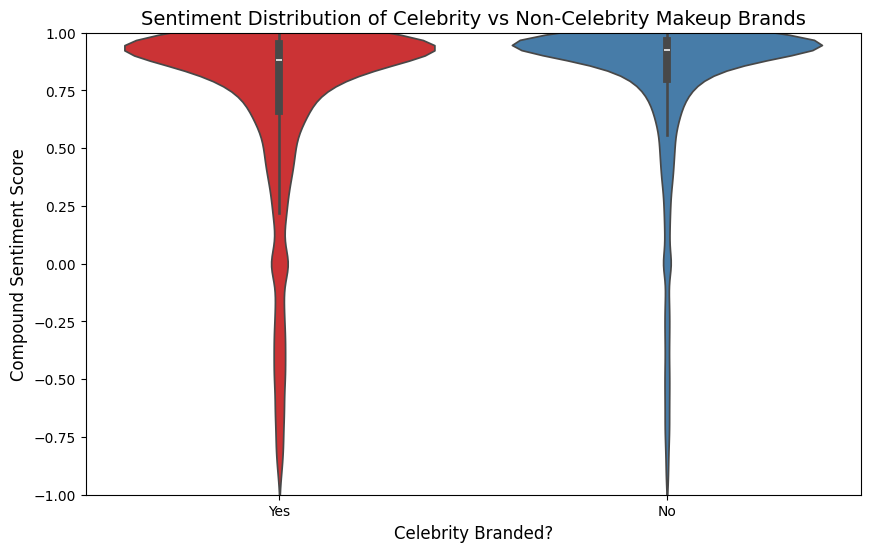

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DS 4002/combined_output.csv')

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='CelebrityBranded', y='CompoundScore', data=df, palette='Set1')

# Customize the plot
plt.title('Sentiment Distribution of Celebrity vs Non-Celebrity Makeup Brands', fontsize=14)
plt.xlabel('Celebrity Branded?', fontsize=12)
plt.ylabel('Compound Sentiment Score', fontsize=12)
plt.ylim(-1, 1)  # Sentiment scores range from -1 (negative) to +1 (positive)

plt.show()


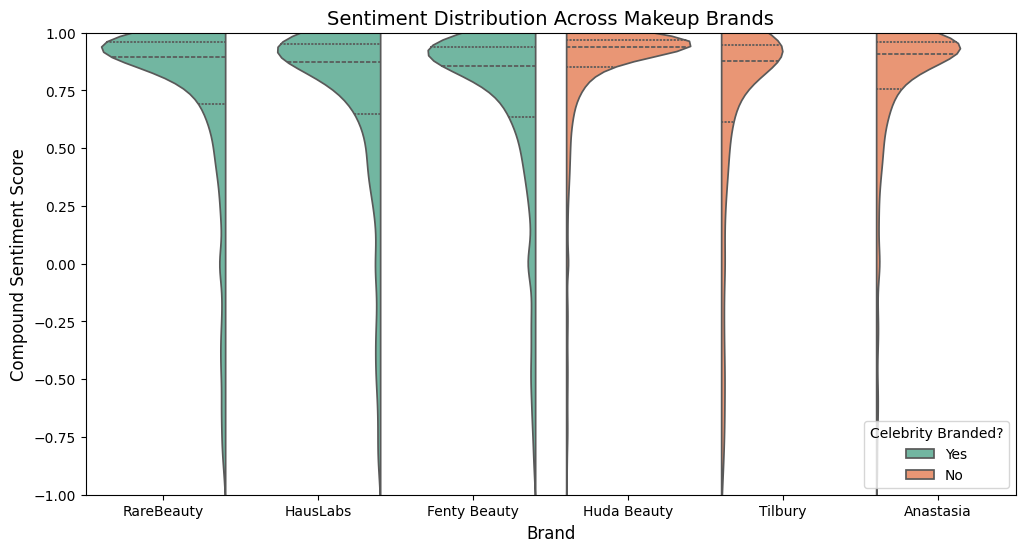

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Create the violin plot
sns.violinplot(
    x='Brand',                # Split by each brand on the x-axis
    y='CompoundScore',        # Sentiment scores on the y-axis
    hue='CelebrityBranded',   # Color code based on celebrity branding
    data=df,                  # Your DataFrame
    split=True,               # Splits the violin by hue in each brand
    inner='quartile',         # Adds lines for median and quartiles
    palette='Set2'            # Color palette for distinct colors
)

# Customize the plot
plt.title('Sentiment Distribution Across Makeup Brands', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Compound Sentiment Score', fontsize=12)
plt.ylim(-1, 1)  # VADER sentiment scores range from -1 (negative) to +1 (positive)

# Move legend to a better location
plt.legend(title='Celebrity Branded?', loc='lower right')

# Display the plot
plt.show()


In [ ]:
# Using VADER -- code from https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

# import SentimentIntensityAnalyzer class from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Function to print sentiments of the sentence.
def sentiment_scores(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)

    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("Sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("Sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("Sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

    print("Sentence Overall Rated As", end=" ")

    # Decide sentiment as positive, negative, or neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= -0.05 :
        print("Negative")
    else :
        print("Neutral")

In [ ]:
review_text = df.loc[0, "ReviewText"]
sentiment_scores(review_text)

Overall sentiment dictionary is :  {'neg': 0.106, 'neu': 0.753, 'pos': 0.141, 'compound': 0.0129}
Sentence was rated as  10.6 % Negative
Sentence was rated as  75.3 % Neutral
Sentence was rated as  14.099999999999998 % Positive
Sentence Overall Rated As Neutral


In [ ]:
print(df.loc[0, "ReviewText"])

It’s overall a good product but, INSANELY difficult to blend. The pigment is spot on though. The packaging is okay but it leaks into the cap.


In [ ]:
# Getting the compound score for each review

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to each review and store only the compound score
df["SentimentScore"] = df["ReviewText"].apply(lambda review: analyzer.polarity_scores(str(review))["compound"])

# Print the updated DataFrame
print(df[["ReviewText", "SentimentScore"]])

                                            ReviewText  SentimentScore
0    It’s overall a good product but, INSANELY diff...          0.0129
1    The tube only consists half of the product, re...          0.8718
2    The MOST underhyped blush imo. Not only is it ...          0.5647
3    Love this color on me worked so well. Easy to ...          0.9542
4    Love this blush!Easy to blend and beautiful pa...          0.9039
..                                                 ...             ...
775  This product is so pretty. It is pine red with...          0.8184
776  I really like the shimmer wands but these are ...          0.8943
777  So excited to see this new launch from Charlot...          0.9501
778  This product is so pretty. It is pine red with...          0.8184
779  I really like the shimmer wands but these are ...          0.8943

[780 rows x 2 columns]


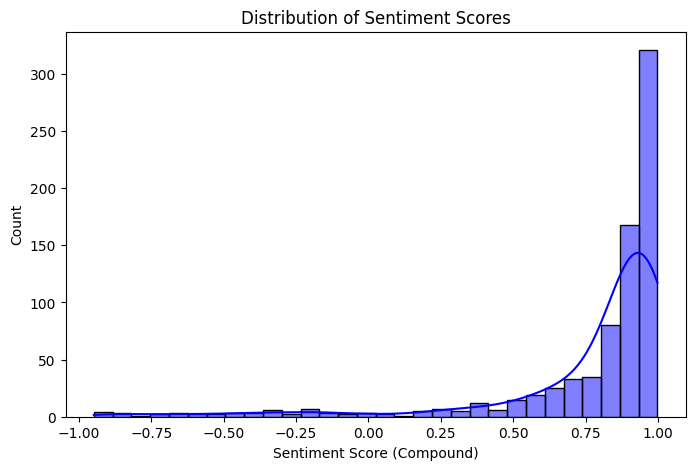

In [ ]:
# Create a histogram of sentiment scores
plt.figure(figsize=(8,5))
sns.histplot(df["SentimentScore"], bins=30, kde=True, color="blue")  # kde=True adds a smooth density curve

# Labels and title
plt.xlabel("Sentiment Score (Compound)")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Scores")

# Show the plot
plt.show()